In [91]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [56]:
a

array([[ 0.07055648,  0.4721629 ,  1.02947045],
       [ 0.17278103,  0.19540225, -1.20425411],
       [-0.24316755,  0.09977009, -0.05420309],
       [-0.38239985, -0.36813001, -0.90416573],
       [ 2.07868541, -2.02652169,  0.63531235],
       [-0.10778407,  0.8850684 , -1.56590653],
       [ 1.59575054,  1.66169628,  1.33385028],
       [ 0.77676369, -0.23659032,  1.3615475 ],
       [ 0.42346855, -0.67703539,  0.75801458],
       [-3.27693512, -0.6866762 , -0.27363788]])

In [166]:
def semivariogram(samples, lags=50, tolerance=1):
    dists = scipy.spatial.distance.cdist(samples[:,:2],samples[:,:2])
    variances = scipy.spatial.distance.cdist(samples[:,2:],samples[:,2:])**2
    variogram_data = np.dstack((dists,variances))
    rows,columns,items = variogram_data.shape
    variogram_data = variogram_data.reshape((rows*columns, items))
    max_distance = variogram_data[:,0].max()
    print(max_distance)
    lag_values = np.linspace(0,max_distance,lags)
    variance_at_lag = np.zeros(lag_values.shape)
    for index, lag in enumerate(lag_values):
        variances_at_lag = variogram_data[np.logical_and(variogram_data[:,0] >lag-tolerance, variogram_data[:,0] <= lag+tolerance)][:,1]
        #print("%d pairs with lag betweeen %.3f and %.3f" % (len(variances_at_lag), lag-tolerance, lag+tolerance))
        if len(variances_at_lag)>0:
            variogram_value=variances_at_lag.sum()/(2*len(variances_at_lag))
        else: variogram_value=0
        variogram_value=len(variances_at_lag)
        variance_at_lag[index]=variogram_value
    plt.plot(lag_values, variance_at_lag)

In [223]:
powerdata5=np.random.power(5,size=(1000,3))*[100,100,1]

In [195]:
normaldata=np.random.normal(size=(1000,3))*[100,100,1]

(array([  2.,   9.,  14.,  31.,  53.,  65., 101., 171., 237., 317.]),
 array([29.18239292, 36.26215416, 43.34191541, 50.42167666, 57.5014379 ,
        64.58119915, 71.6609604 , 78.74072164, 85.82048289, 92.90024414,
        99.98000538]),
 <BarContainer object of 10 artists>)

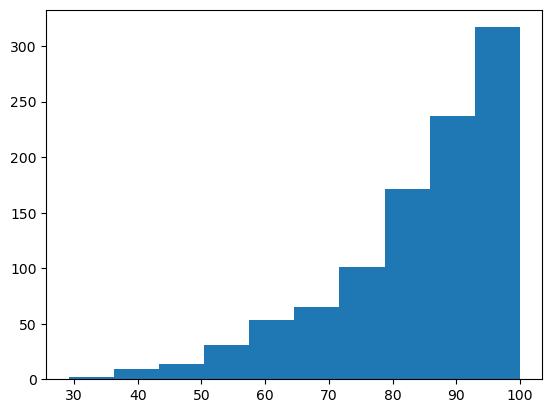

In [224]:
plt.hist(powerdata5[:,0])

(array([  6.,  13.,  13.,  31.,  56.,  82., 109., 159., 229., 302.]),
 array([30.5602672 , 37.50252185, 44.4447765 , 51.38703115, 58.32928581,
        65.27154046, 72.21379511, 79.15604977, 86.09830442, 93.04055907,
        99.98281373]),
 <BarContainer object of 10 artists>)

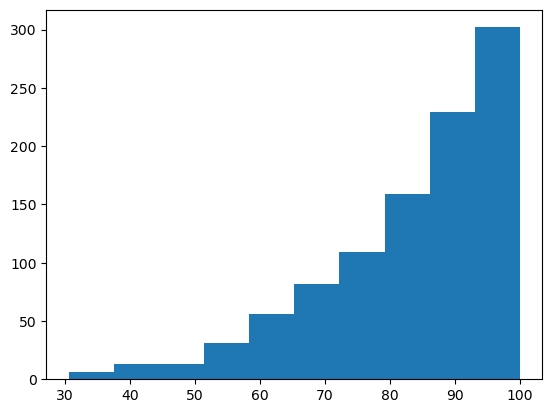

In [225]:
plt.hist(powerdata5[:,1])

(array([  4.,  10.,  14.,  25.,  36.,  66., 118., 155., 233., 339.]),
 array([0.22260761, 0.30031091, 0.37801421, 0.45571751, 0.53342081,
        0.61112412, 0.68882742, 0.76653072, 0.84423402, 0.92193732,
        0.99964062]),
 <BarContainer object of 10 artists>)

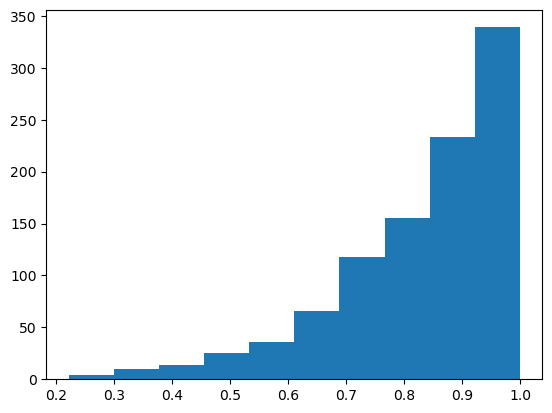

In [226]:
plt.hist(powerdata5[:,2])

92.44656624905868


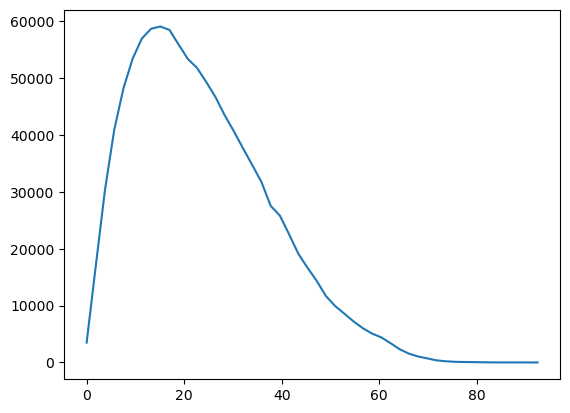

In [227]:
semivariogram(powerdata5)

In [228]:
powerdata1=np.random.power(1,size=(1000,3))*[100,100,1]

(array([ 84., 110., 110., 104., 115.,  99.,  91.,  97., 100.,  90.]),
 array([ 0.10976231, 10.09168183, 20.07360135, 30.05552087, 40.03744039,
        50.01935991, 60.00127944, 69.98319896, 79.96511848, 89.947038  ,
        99.92895752]),
 <BarContainer object of 10 artists>)

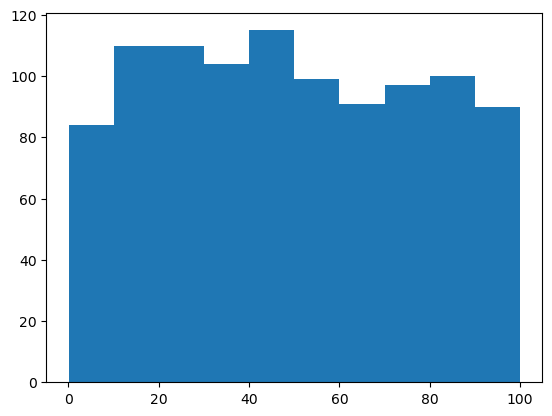

In [229]:
plt.hist(powerdata1[:,0])

(array([ 92.,  95., 101., 100., 100., 108., 101., 101.,  97., 105.]),
 array([9.71095549e-02, 1.00756583e+01, 2.00542071e+01, 3.00327559e+01,
        4.00113047e+01, 4.99898535e+01, 5.99684023e+01, 6.99469511e+01,
        7.99254999e+01, 8.99040487e+01, 9.98825974e+01]),
 <BarContainer object of 10 artists>)

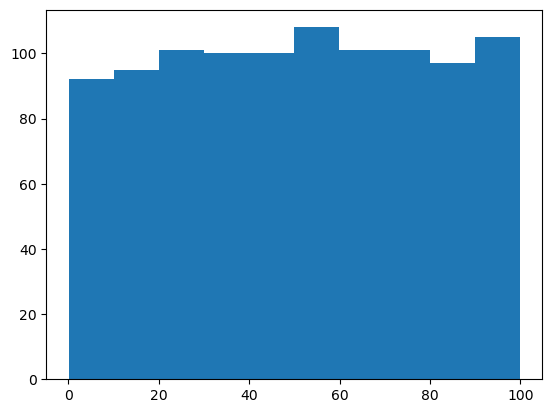

In [230]:
plt.hist(powerdata1[:,1])

(array([102.,  81., 108.,  90.,  91., 123., 108.,  99.,  91., 107.]),
 array([2.99387686e-04, 1.00262427e-01, 2.00225467e-01, 3.00188506e-01,
        4.00151546e-01, 5.00114585e-01, 6.00077625e-01, 7.00040664e-01,
        8.00003704e-01, 8.99966743e-01, 9.99929783e-01]),
 <BarContainer object of 10 artists>)

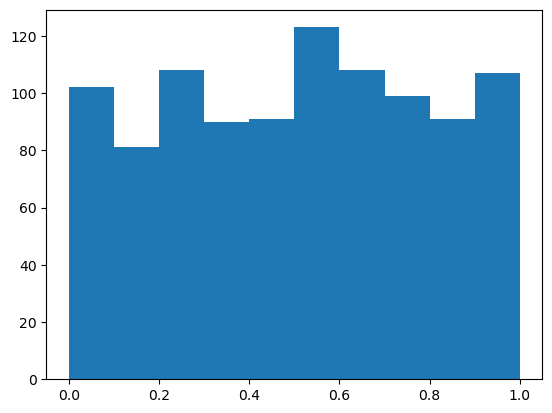

In [231]:
plt.hist(powerdata1[:,2])

138.15654814420222


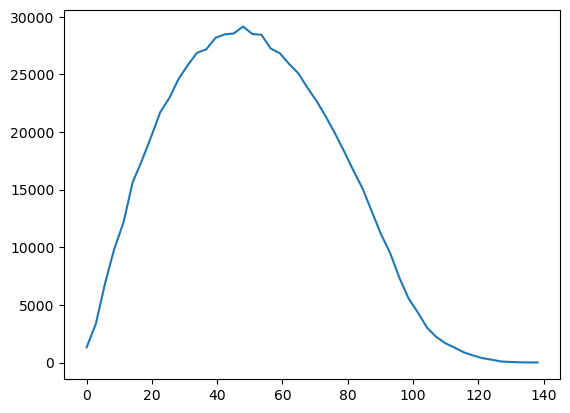

In [232]:
semivariogram(powerdata1)

91.38463332236925


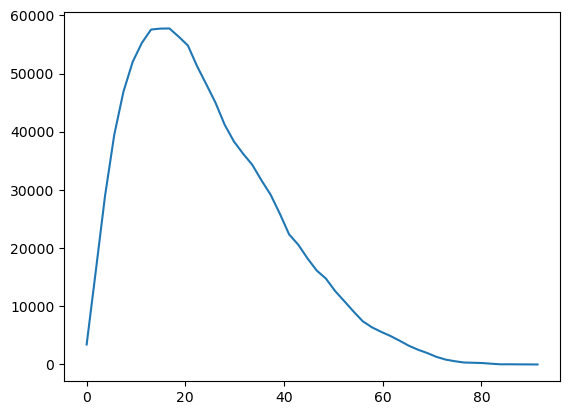

In [219]:
semivariogram(powerdata)

(array([[152., 349., 224., ...,   7.,   0.,   0.],
        [145., 340., 255., ...,   6.,   2.,   0.],
        [167., 311., 297., ...,   3.,   0.,   0.],
        ...,
        [ 45., 125., 209., ...,  10.,   1.,   0.],
        [212., 267., 192., ...,  13.,   2.,   0.],
        [ 53., 122., 217., ...,  12.,   4.,   0.]]),
 array([ 0.        ,  9.13846333, 18.27692666, 27.41539   , 36.55385333,
        45.69231666, 54.83077999, 63.96924333, 73.10770666, 82.24616999,
        91.38463332]),
 <a list of 1000 BarContainer objects>)

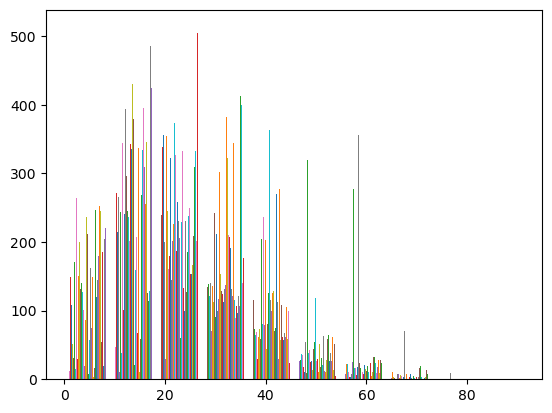

In [209]:
plt.hist(scipy.spatial.distance.cdist(powerdata[:,:2],powerdata[:,:2]))

689.3961800255602


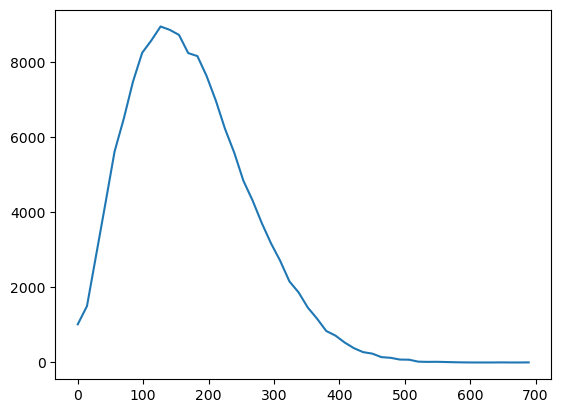

In [233]:
semivariogram(normaldata)

(array([[174., 361., 300., ...,   0.,   0.,   0.],
        [ 71., 243., 290., ...,   1.,   0.,   0.],
        [168., 345., 286., ...,   0.,   0.,   0.],
        ...,
        [ 30., 129., 269., ...,   2.,   1.,   0.],
        [ 47., 180., 274., ...,   0.,   0.,   0.],
        [155., 332., 322., ...,   0.,   0.,   0.]]),
 array([  0.        ,  68.939618  , 137.87923601, 206.81885401,
        275.75847201, 344.69809001, 413.63770802, 482.57732602,
        551.51694402, 620.45656202, 689.39618003]),
 <a list of 1000 BarContainer objects>)

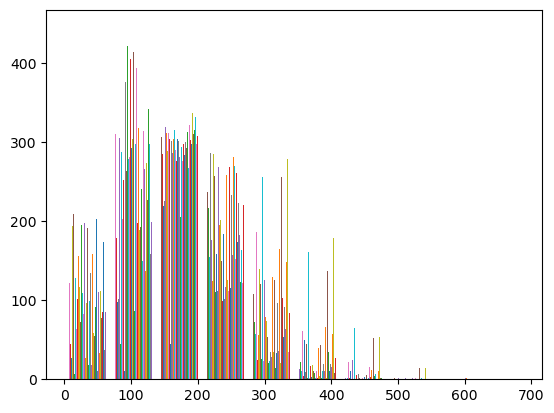

In [200]:
plt.hist(scipy.spatial.distance.cdist(normaldata[:,:2],normaldata[:,:2]))

(array([  3.,   7.,  16.,  28.,  58.,  65., 112., 168., 226., 317.]),
 array([26.39293272, 33.75290722, 41.11288172, 48.47285622, 55.83283072,
        63.19280522, 70.55277972, 77.91275422, 85.27272872, 92.63270322,
        99.99267772]),
 <BarContainer object of 10 artists>)

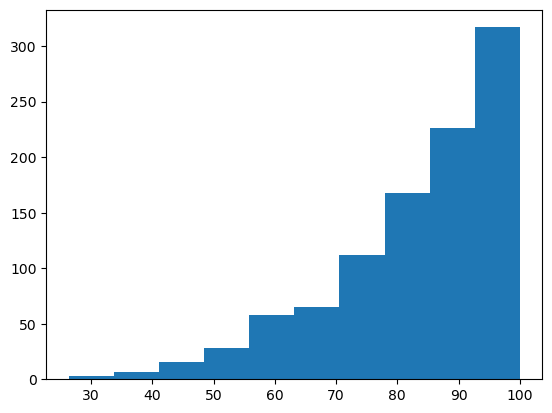

In [211]:
plt.hist(powerdata[:,1])

In [234]:
cordata=np.random.normal(size=(1000,2))*[100,100]

In [247]:
cordata=np.dstack((cordata[:,0],cordata[:,1],cordata[:,0]+cordata[:,1]))[0]

53.43105868348663


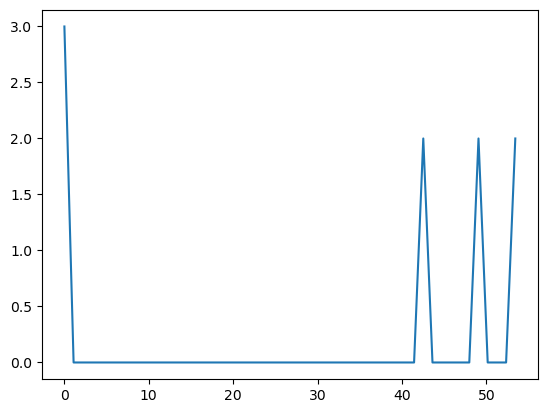

In [249]:
semivariogram(cordata)